# **Bitcoin Prediction Model**


1. Feature Engineering

   * Create lag features (e.g., previous M2 values - 30, 60, 90, 108, 120 day lags)

   * Compute percentage changes for M2, CPI, BTC price, etc.

   * Normalize or scale features (MinMaxScaler, StandardScaler)

2. Data Visualization

   * M2 vs. Bitcoin price

   * Correlation heatmap

3. Train Models

   * Linear Regression

   * Random Forest
   
   * XGBoost
   

4. Backtesting & Evaluation

   * Train on past data, test on more recent Bitcoin prices

   * Use RMSE, MAE, and R² scores to measure performance

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

In [ ]:
# Read csv
df = pd.read_csv('bitcoin.csv')

In [ ]:
df.head(3)

,date,btc_price,us_m2,cpi,ppi,fed_funds_rate,sp500,nasdaq,btc_volume,japan_m2,...,canada_m2,us_m2_scaled,japan_m2_usd,china_m2_usd,europe_m2_usd,brazil_m2_usd,india_m2_usd,canada_m2_usd,russia_m2_usd,global_m2
0,2015-01-02,315.032013,11788.8,234.766194,191.970968,0.11,2058.199951,4726.810059,7860650.0,7.559858e+12,...,1.306212e+12,1.178880e+13,1.133979e+15,1.391835e+14,1.213405e+13,1.082177e+13,1.854711e+15,1.698076e+12,2.948202e+15,6.112517e+15
1,2015-01-03,281.082001,11788.8,234.785387,191.941935,0.11,2058.199951,4726.810059,33054400.0,7.559858e+12,...,1.306212e+12,1.178880e+13,1.133979e+15,1.391835e+14,1.213405e+13,1.082177e+13,1.854711e+15,1.698076e+12,2.948202e+15,6.112517e+15
2,2015-01-04,264.195007,11788.8,234.804581,191.912903,0.11,2058.199951,4726.810059,55629100.0,7.559858e+12,...,1.306212e+12,1.178880e+13,1.133979e+15,1.391835e+14,1.213405e+13,1.082177e+13,1.854711e+15,1.698076e+12,2.948202e+15,6.112517e+15


In [ ]:
# drop unnecessary columns: columns that contain japan, canada, europe, or brazil
df = df.drop(columns=['japan_m2', 'canada_m2', 'europe_m2', 'brazil_m2', 'india_m2', 'russia_m2', 'china_m2'])
df = df.drop(columns=['japan_m2_usd', 'canada_m2_usd', 'europe_m2_usd', 'brazil_m2_usd', 'india_m2_usd', 'russia_m2_usd', 'china_m2_usd'])
df.head(3)

,date,btc_price,us_m2,cpi,ppi,fed_funds_rate,sp500,nasdaq,btc_volume,us_m2_scaled,global_m2
0,2015-01-02,315.032013,11788.8,234.766194,191.970968,0.11,2058.199951,4726.810059,7860650.0,1.178880e+13,6.112517e+15
1,2015-01-03,281.082001,11788.8,234.785387,191.941935,0.11,2058.199951,4726.810059,33054400.0,1.178880e+13,6.112517e+15
2,2015-01-04,264.195007,11788.8,234.804581,191.912903,0.11,2058.199951,4726.810059,55629100.0,1.178880e+13,6.112517e+15


In [ ]:
# drop us_m2 column
df = df.drop(columns=['us_m2'])

In [ ]:
df.head()

,date,btc_price,cpi,ppi,fed_funds_rate,sp500,nasdaq,btc_volume,us_m2_scaled,global_m2
0,2015-01-02,315.032013,234.766194,191.970968,0.11,2058.199951,4726.810059,7860650.0,1.178880e+13,6.112517e+15
1,2015-01-03,281.082001,234.785387,191.941935,0.11,2058.199951,4726.810059,33054400.0,1.178880e+13,6.112517e+15
2,2015-01-04,264.195007,234.804581,191.912903,0.11,2058.199951,4726.810059,55629100.0,1.178880e+13,6.112517e+15
3,2015-01-05,274.473999,234.823774,191.883871,0.11,2020.579956,4652.569824,43962800.0,1.178880e+13,6.112517e+15
4,2015-01-06,286.188995,234.842968,191.854839,0.11,2002.609985,4592.740234,23245700.0,1.178880e+13,6.112517e+15


# **Feature Engineering**

Create new date features (month and year): Extract month and year from the date

In [ ]:
# Extract month and year from the current date column
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [ ]:
df['year'].value_counts().sort_index()

,count
year,
2015,364
2016,366
2017,365
2018,365
2019,365
2020,366
2021,365
2022,365
2023,365


In [ ]:
df['month'].value_counts().sort_index()

,count
month,
1,340
2,311
3,339
4,300
5,310
6,300
7,310
8,310
9,300


Create lag features:

In [ ]:
# Create lag features that reflect past bitcoin prices
df['bitcoin_price_lag_30'] = df['btc_price'].shift(30)
df['bitcoin_price_lag_60'] = df['btc_price'].shift(60)
df['bitcoin_price_lag_90'] = df['btc_price'].shift(90)
df['bitcoin_price_lag_108'] = df['btc_price'].shift(108)
df['bitcoin_price_lag_120'] = df['btc_price'].shift(120)

In [ ]:
df = df.fillna(method='ffill')

<ipython-input-9-2c428d02cf67>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


Creating Rolling Averages:

In [ ]:
window_sizes = [5, 10, 30, 50]  # Rolling windows (5-day, 10-day, 30-day, 50-day averages)
for window in window_sizes:
    df[f'bitcoin_price_rolling_avg_{window}'] = df['btc_price'].rolling(window=window).mean()

# Display the first few rows to confirm rolling averages
print(df.head())

        date   btc_price         cpi         ppi  fed_funds_rate        sp500  \
0 2015-01-02  315.032013  234.766194  191.970968            0.11  2058.199951   
1 2015-01-03  281.082001  234.785387  191.941935            0.11  2058.199951   
2 2015-01-04  264.195007  234.804581  191.912903            0.11  2058.199951   
3 2015-01-05  274.473999  234.823774  191.883871            0.11  2020.579956   
4 2015-01-06  286.188995  234.842968  191.854839            0.11  2002.609985   

        nasdaq  btc_volume  us_m2_scaled     global_m2  ...  year  \
0  4726.810059   7860650.0  1.178880e+13  6.112517e+15  ...  2015   
1  4726.810059  33054400.0  1.178880e+13  6.112517e+15  ...  2015   
2  4726.810059  55629100.0  1.178880e+13  6.112517e+15  ...  2015   
3  4652.569824  43962800.0  1.178880e+13  6.112517e+15  ...  2015   
4  4592.740234  23245700.0  1.178880e+13  6.112517e+15  ...  2015   

   bitcoin_price_lag_30  bitcoin_price_lag_60  bitcoin_price_lag_90  \
0                   NaN    

In [ ]:
# fill missing values
df = df.fillna(method='ffill')

<ipython-input-11-4ddd10b1c9bb>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [ ]:
# Backward fill if forward fill doesn't work
df = df.fillna(method='bfill')

<ipython-input-12-bbb35cfd3eba>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


In [ ]:
print(df.head())

        date   btc_price         cpi         ppi  fed_funds_rate        sp500  \
0 2015-01-02  315.032013  234.766194  191.970968            0.11  2058.199951   
1 2015-01-03  281.082001  234.785387  191.941935            0.11  2058.199951   
2 2015-01-04  264.195007  234.804581  191.912903            0.11  2058.199951   
3 2015-01-05  274.473999  234.823774  191.883871            0.11  2020.579956   
4 2015-01-06  286.188995  234.842968  191.854839            0.11  2002.609985   

        nasdaq  btc_volume  us_m2_scaled     global_m2  ...  year  \
0  4726.810059   7860650.0  1.178880e+13  6.112517e+15  ...  2015   
1  4726.810059  33054400.0  1.178880e+13  6.112517e+15  ...  2015   
2  4726.810059  55629100.0  1.178880e+13  6.112517e+15  ...  2015   
3  4652.569824  43962800.0  1.178880e+13  6.112517e+15  ...  2015   
4  4592.740234  23245700.0  1.178880e+13  6.112517e+15  ...  2015   

   bitcoin_price_lag_30  bitcoin_price_lag_60  bitcoin_price_lag_90  \
0            315.032013    

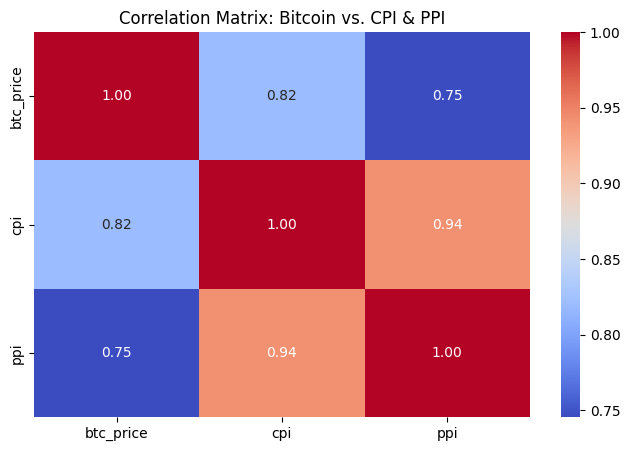

In [ ]:
# Focus on PPI and CPI as indicators of inflation

# Compute correlation matrix
correlation_matrix = df[['btc_price', 'cpi', 'ppi']].corr()

# Visualize the correlation
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Bitcoin vs. CPI & PPI")
plt.show()

Results: A positive correlation between PPI and Bitcoin price and CPI and Bitcoin price

* As inflation rises (CPI & PPI increase), bitcoin price tends to rise: this supports the idea that bitcoin is seen as an inflation hedge
* CPI has a slightly stronger correlation with bitcoin than PPI, suggesting that CPI has a greater impact on bitcoin prices than PPI

In [ ]:
# Create lag features for CPI and PPI (1-month and 3-month lags)
df["cpi_lag_1m"] = df["cpi"].shift(1)
df["cpi_lag_3m"] = df["cpi"].shift(3)
df["ppi_lag_1m"] = df["ppi"].shift(1)
df["ppi_lag_3m"] = df["ppi"].shift(3)

In [ ]:
df.head()

,date,btc_price,cpi,ppi,fed_funds_rate,sp500,nasdaq,btc_volume,us_m2_scaled,global_m2,...,bitcoin_price_lag_108,bitcoin_price_lag_120,bitcoin_price_rolling_avg_5,bitcoin_price_rolling_avg_10,bitcoin_price_rolling_avg_30,bitcoin_price_rolling_avg_50,cpi_lag_1m,cpi_lag_3m,ppi_lag_1m,ppi_lag_3m
0,2015-01-02,315.032013,234.766194,191.970968,0.11,2058.199951,4726.810059,7860650.0,1.178880e+13,6.112517e+15,...,315.032013,315.032013,284.194403,282.9522,246.600333,240.283741,NaN,NaN,NaN,NaN
1,2015-01-03,281.082001,234.785387,191.941935,0.11,2058.199951,4726.810059,33054400.0,1.178880e+13,6.112517e+15,...,315.032013,315.032013,284.194403,282.9522,246.600333,240.283741,234.766194,NaN,191.970968,NaN
2,2015-01-04,264.195007,234.804581,191.912903,0.11,2058.199951,4726.810059,55629100.0,1.178880e+13,6.112517e+15,...,315.032013,315.032013,284.194403,282.9522,246.600333,240.283741,234.785387,NaN,191.941935,NaN
3,2015-01-05,274.473999,234.823774,191.883871,0.11,2020.579956,4652.569824,43962800.0,1.178880e+13,6.112517e+15,...,315.032013,315.032013,284.194403,282.9522,246.600333,240.283741,234.804581,234.766194,191.912903,191.970968
4,2015-01-06,286.188995,234.842968,191.854839,0.11,2002.609985,4592.740234,23245700.0,1.178880e+13,6.112517e+15,...,315.032013,315.032013,284.194403,282.9522,246.600333,240.283741,234.823774,234.785387,191.883871,191.941935


In [ ]:
df = df.fillna(method='ffill')

<ipython-input-14-2c428d02cf67>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [ ]:
# Backward fill if forward fill doesn't work
df = df.fillna(method='bfill')

<ipython-input-15-bbb35cfd3eba>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


In [ ]:
# Create forward-shifted M2 features
df["us_m2_future_108"] = df["us_m2_scaled"].shift(-108)
df["global_m2_future_108"] = df["global_m2"].shift(-108)

In [ ]:
# Use rolling averages to smooth fluctuations
df["us_m2_rolling_avg_30"] = df["us_m2_scaled"].rolling(window=30).mean()
df["global_m2_rolling_avg_30"] = df["global_m2"].rolling(window=30).mean()

In [ ]:
# Look at the percentage change in m2
df["us_m2_pct_change_30"] = df["us_m2_scaled"].pct_change(periods=30)
df["global_m2_pct_change_30"] = df["global_m2"].pct_change(periods=30)

In [ ]:
# see how M2 changes relative to inflation
df["m2_cpi_ratio"] = df["us_m2_scaled"] / df["cpi"]
df["m2_ppi_ratio"] = df["us_m2_scaled"] / df["ppi"]

In [ ]:
# export latest version of csv
df.to_csv('bitcoin_final.csv', index=False)


In [ ]:
# download bitcoin_final
from google.colab import files
files.download('bitcoin_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Models:**

1. Linear Regression

2. Random Forest: A more powerful model for regression tasks and can capture non-linear relationships

3. XGBoost: A boosting algorithm that often works well on time-series problems



Splitting the Data -

- Training and testing: 80% training, 20% testing
- Train-test split by time: ensure the split is chronological (i.e., using past data for training and future data for testing)


# Model #1: Linear Regression

Step 1: Define Features and Target


Features:

 - Macroeconomic indicators: cpi, ppi, fed_funds_rate, us_m2_scaled, global_m2

- Stock market indices: sp500, nasdaq

- Bitcoin market data: btc_volume

- Lagged Bitcoin prices: bitcoin_price_lag_30, bitcoin_price_lag_60, bitcoin_price_lag_90, bitcoin_price_lag_108, bitcoin_price_lag_120

- Rolling averages: bitcoin_price_rolling_avg_5, bitcoin_price_rolling_avg_10, bitcoin_price_rolling_avg_30, bitcoin_price_rolling_avg_50

- Lagged CPI & PPI: cpi_lag_1m, cpi_lag_3m, ppi_lag_1m, ppi_lag_3m

- Time-based features: month, year

Target Variable: btc_price

In [ ]:
# Define the features and target variable
features = [
    "cpi", "ppi", "fed_funds_rate", "sp500", "nasdaq", "btc_volume",
    "us_m2_scaled", "global_m2", "bitcoin_price_lag_30", "bitcoin_price_lag_60",
    "bitcoin_price_lag_90", "bitcoin_price_lag_108", "bitcoin_price_lag_120",
    "bitcoin_price_rolling_avg_5", "bitcoin_price_rolling_avg_10",
    "bitcoin_price_rolling_avg_30", "bitcoin_price_rolling_avg_50",
    "cpi_lag_1m", "cpi_lag_3m", "ppi_lag_1m", "ppi_lag_3m", "month", "year"
]
target = "btc_price"

In [ ]:
# Define X (features) and y (target)
X = df[features]
y = df[target]

In [ ]:
# Add constant for intercept
X = sm.add_constant(X)

In [ ]:
# Train the Linear Regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              btc_price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.682e+05
Date:                Thu, 03 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:15:09   Log-Likelihood:                -31061.
No. Observations:                3740   AIC:                         6.215e+04
Df Residuals:                    3725   BIC:                         6.225e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

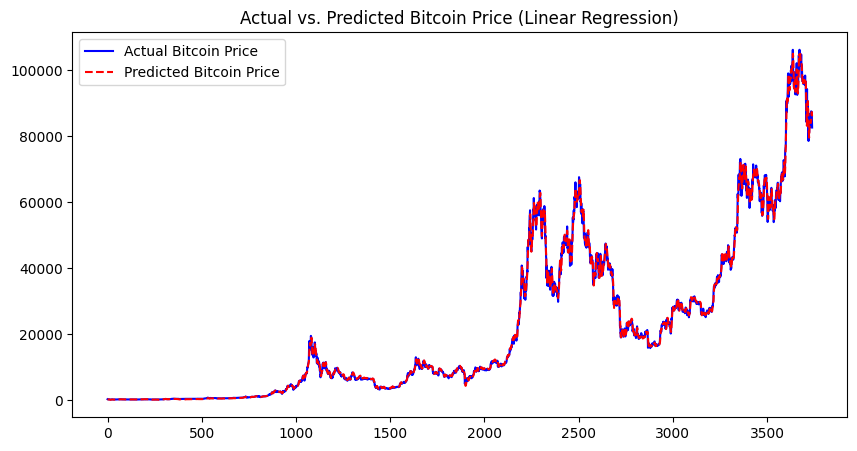

In [ ]:
# Make predictions
df["predicted_price"] = model.predict(X)

# Plot actual vs predicted Bitcoin price
plt.figure(figsize=(10,5))
plt.plot(df.index, df["btc_price"], label="Actual Bitcoin Price", color="blue")
plt.plot(df.index, df["predicted_price"], label="Predicted Bitcoin Price", color="red", linestyle="dashed")
plt.legend()
plt.title("Actual vs. Predicted Bitcoin Price (Linear Regression)")
plt.show()

Results of Linear Regression model: the model is highly predictive, but it has multicollinearity and overfitting
- could improve the model by removing insignificant features, or trying a Ridge/Lasso regression

# Model #2: Random Forest Model

In [ ]:
# Define features and target
features = [
    "cpi", "ppi", "fed_funds_rate", "sp500", "nasdaq", "btc_volume",
    "us_m2_scaled", "global_m2", "bitcoin_price_lag_30", "bitcoin_price_lag_60",
    "bitcoin_price_lag_90", "bitcoin_price_lag_108", "bitcoin_price_lag_120",
    "bitcoin_price_rolling_avg_5", "bitcoin_price_rolling_avg_10",
    "bitcoin_price_rolling_avg_30", "bitcoin_price_rolling_avg_50",
    "cpi_lag_1m", "cpi_lag_3m", "ppi_lag_1m", "ppi_lag_3m", "month", "year", "us_m2_future_108", "global_m2_future_108",
    "us_m2_rolling_avg_30", "global_m2_rolling_avg_30",
    "us_m2_pct_change_30", "global_m2_pct_change_30",
    "m2_cpi_ratio", "m2_ppi_ratio"
]
target = "btc_price"

In [ ]:
# Split data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10, n_jobs=-1)

# Train model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

In [ ]:
# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 521.40
Root Mean Squared Error (RMSE): 1034.06
R-squared (R2): 0.9983


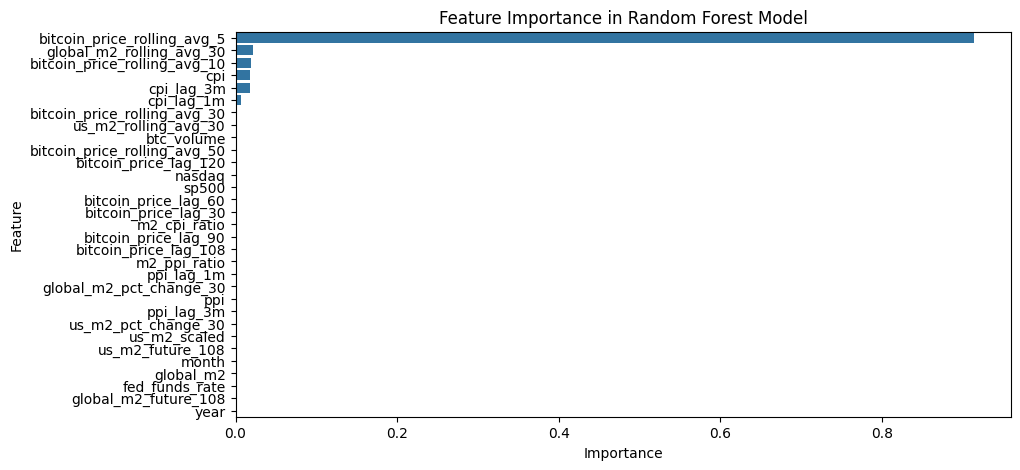

In [ ]:
# Get feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance in Random Forest Model")
plt.show()

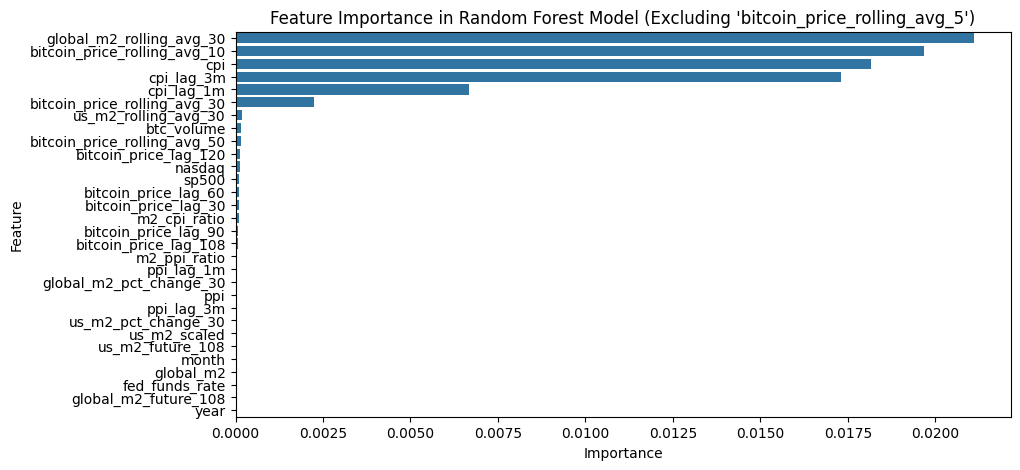

In [ ]:
# get the feature importance but exclude bitcoin price rolling avg 5

# Get feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Exclude 'bitcoin_price_rolling_avg_5'
feature_importance_df = feature_importance_df[feature_importance_df["Feature"] != "bitcoin_price_rolling_avg_5"]

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance in Random Forest Model (Excluding 'bitcoin_price_rolling_avg_5')")
plt.show()


# Model #3: XGBoost

In [ ]:
# Define features and target
features = [
    "cpi", "ppi", "fed_funds_rate", "sp500", "nasdaq", "btc_volume",
    "us_m2_scaled", "global_m2", "bitcoin_price_lag_30", "bitcoin_price_lag_60",
    "bitcoin_price_lag_90", "bitcoin_price_lag_108", "bitcoin_price_lag_120",
    "bitcoin_price_rolling_avg_5", "bitcoin_price_rolling_avg_10",
    "bitcoin_price_rolling_avg_30", "bitcoin_price_rolling_avg_50",
    "cpi_lag_1m", "cpi_lag_3m", "ppi_lag_1m", "ppi_lag_3m", "month", "year", "us_m2_future_108", "global_m2_future_108",
    "us_m2_rolling_avg_30", "global_m2_rolling_avg_30",
    "us_m2_pct_change_30", "global_m2_pct_change_30",
    "m2_cpi_ratio", "m2_ppi_ratio"
]
target = "btc_price"

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Split data into training and testing sets
X = df[features]
y = df[target]

# Initialize XGBoost Regressor
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=10, random_state=42)

In [ ]:
# Split data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X_train to 2D
if X_train.ndim != 2:
    X_train = X_train.reshape(X_train.shape[0], -1)

# Initialize XGBoost Regressor
xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=10, random_state=42)

# Train the model
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb:.2f}")
print(f"XGBoost - RMSE: {rmse_xgb:.2f}")
print(f"XGBoost - R²: {r2_xgb:.4f}")

XGBoost - MAE: 481.43
XGBoost - RMSE: 939.26
XGBoost - R²: 0.9986


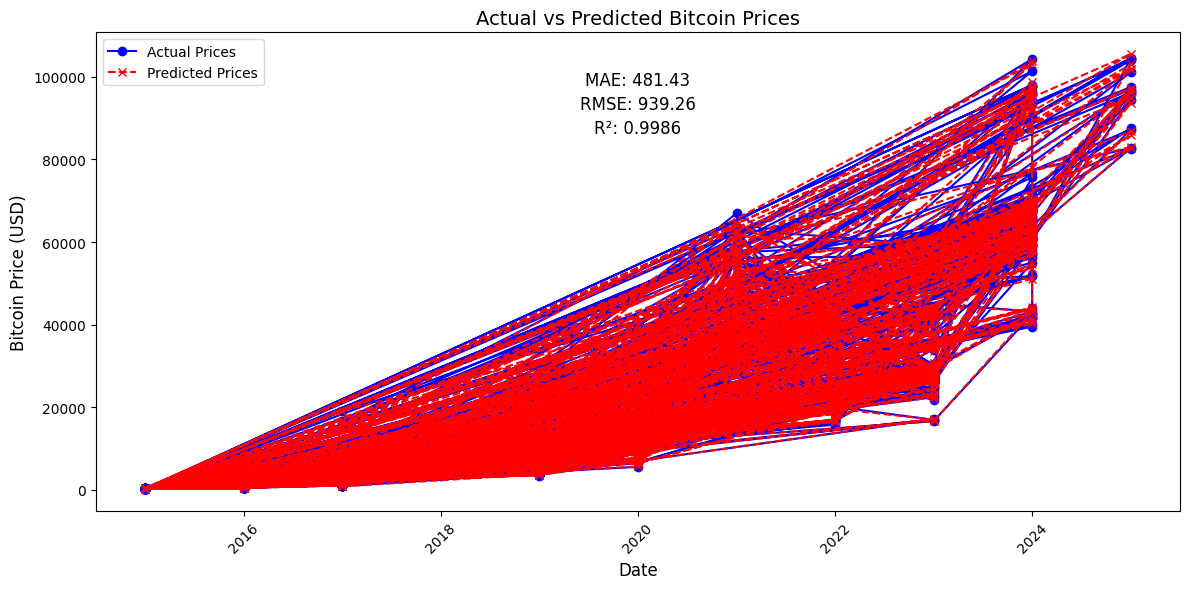

In [ ]:
# graph actual vs predicted bitcoin prices and show the year on x axis

dates = df['year']
actual_prices = y_test # Use y_test for actual prices
predicted_prices = y_pred_xgb

# Calculate MAE, RMSE, R²
mae = np.mean(np.abs(actual_prices - predicted_prices))
rmse = np.sqrt(np.mean((actual_prices - predicted_prices)**2))
r2 = 1 - (np.sum((actual_prices - predicted_prices)**2) / np.sum((actual_prices - np.mean(actual_prices))**2))

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(dates.iloc[y_test.index], actual_prices, label="Actual Prices", color='blue', linestyle='-', marker='o') # Plot against the dates corresponding to y_test
plt.plot(dates.iloc[y_test.index], predicted_prices, label="Predicted Prices", color='red', linestyle='--', marker='x') # Plot against the dates corresponding to y_test

# Adding labels and title
plt.title("Actual vs Predicted Bitcoin Prices", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Bitcoin Price (USD)", fontsize=12)
plt.legend()

# Display the metrics on the plot
plt.text(0.5, 0.9, f"MAE: {mae:.2f}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.5, 0.85, f"RMSE: {rmse:.2f}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.5, 0.8, f"R²: {r2:.4f}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='black')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

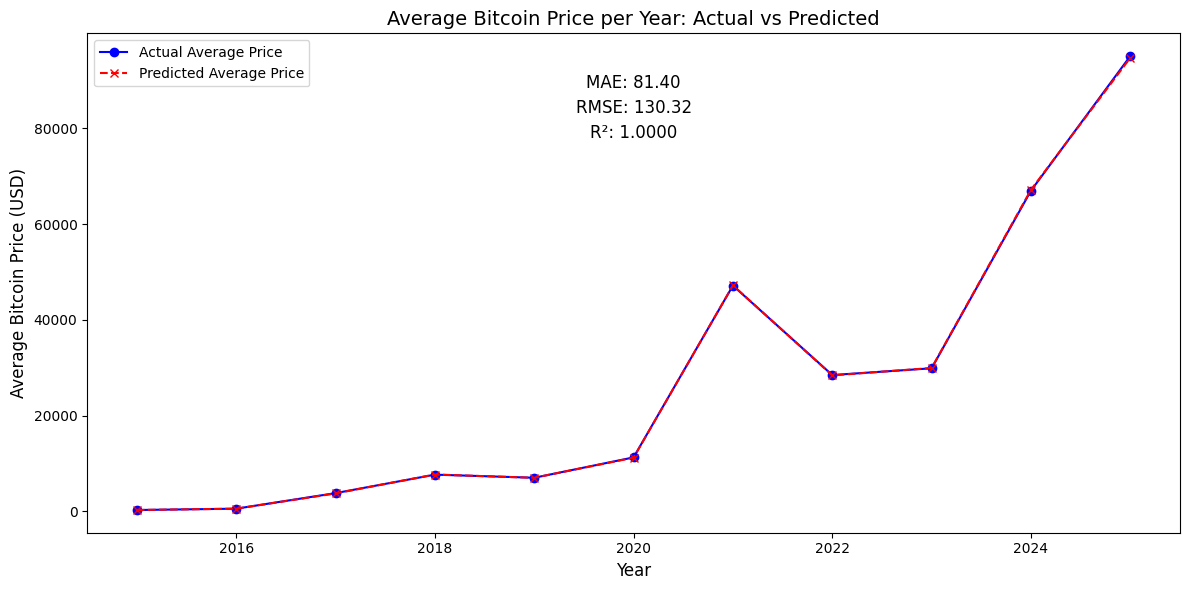

In [ ]:
# Create a DataFrame to store actual and predicted prices with year
results_df = pd.DataFrame({'year': df['year'].iloc[y_test.index],
                           'actual_price': y_test,
                           'predicted_price': y_pred_xgb})

# Group by year and calculate average prices
avg_prices = results_df.groupby('year')[['actual_price', 'predicted_price']].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(avg_prices['year'], avg_prices['actual_price'], label="Actual Average Price", color='blue', marker='o')
plt.plot(avg_prices['year'], avg_prices['predicted_price'], label="Predicted Average Price", color='red', marker='x', linestyle='--')

# Calculate overall MAE, RMSE, R² for the yearly averages
mae = np.mean(np.abs(avg_prices['actual_price'] - avg_prices['predicted_price']))
rmse = np.sqrt(np.mean((avg_prices['actual_price'] - avg_prices['predicted_price'])**2))
r2 = 1 - (np.sum((avg_prices['actual_price'] - avg_prices['predicted_price'])**2) / np.sum((avg_prices['actual_price'] - np.mean(avg_prices['actual_price']))**2))

# Adding labels and title
plt.title("Average Bitcoin Price per Year: Actual vs Predicted", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Bitcoin Price (USD)", fontsize=12)
plt.legend()

# Display the metrics on the plot
plt.text(0.5, 0.9, f"MAE: {mae:.2f}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.5, 0.85, f"RMSE: {rmse:.2f}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.5, 0.8, f"R²: {r2:.4f}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, color='black')

# Show the plot
plt.tight_layout()
plt.show()

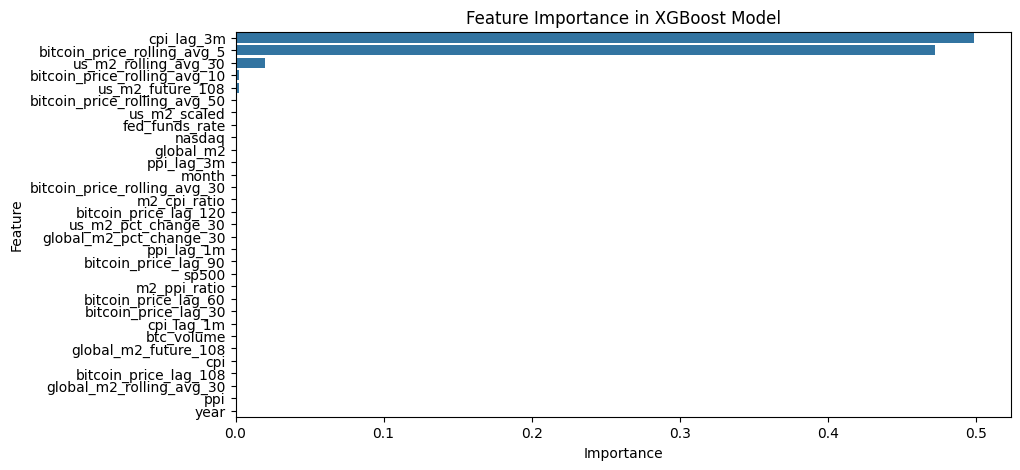

In [ ]:
# Get feature importance from XGBoost
xgb_importance = xgb.feature_importances_

# Create a dataframe to store feature importance
feature_importance_df = pd.DataFrame({"Feature": features, "Importance": xgb_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance in XGBoost Model")
plt.show()

To reduce overfitting:

- reduce model complexity - limit the depth of the trees (max_depth)
- increase minimum samples per leaf (min_sameples_leaf), so trees are forced to have more data per node, making them simpler
- add regularization - increase lambda (L2 regularization) or alpha (L1 regularization) in XGBoost to penalize overly complex models
- Increase training data - overfitting often occurs when the model is too complex for the available data - increasing the dataset size or adding more features may help
- ensemble methods - using bagging, or boosting to reduce variance and improve model stability